In [126]:
# importing python libraries for analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import openpyxl 
import seaborn as sns

In [127]:
# Show all columns(instead of cascading columns in the middle)
pd.set_option("display.max_columns",None)
# Don't show numbers in scientific notation
pd.set_option("display.float_format","{:.2f}".format)

In [128]:
# reading the csv and xlsx file
df_customer = pd.read_csv("QVI_purchase_behaviour.csv")
df_transactions =pd.read_excel("QVI_transaction_data.xlsx")


In [129]:
# Converting excel data with pandas
df_transactions['DATE'] = pd.to_datetime(df_transactions['DATE'], unit='d', origin='1899-12-30')

In [130]:
#Displaying the data
df_customer.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [131]:
df_transactions.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80


In [132]:
#Printing column names, types, and non-null values
df_customer.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [133]:
#Printing column names, types, and non-null values
df_transactions.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [134]:
df_customer.shape

(72637, 3)

In [135]:
df_transactions.shape

(264836, 8)

In [136]:
#looking for duplicates in customer data
df_customer.duplicated().sum()

0

In [137]:
#looking for duplicates in the dataframe for transactions
df_transactions.duplicated().sum()

1

In [138]:
# identifying the duplicates
df_transactions.loc[df_transactions.duplicated(keep = 'first'),:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.00


In [139]:
#dropping duplicates
df_transactions.drop_duplicates(keep = 'first').shape

(264835, 8)

In [140]:
#identifying irregular values
df_transactions.iloc[354,5]

'Kettle 135g Swt Pot Sea Salt'

In [141]:
#Cleaning mixed value
df_transactions['PROD_NAME'] = df_transactions['PROD_NAME'].replace(['Kettle 135g Swt Pot Sea Salt'],'Kettle Swt Pot Sea Salt 135g')

In [142]:
df_transactions.iloc[354,5]

'Kettle Swt Pot Sea Salt 135g'

In [143]:
# removing salsa products in the transaction data
df_transactions['PROD_NAME'].unique()[:15]

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g'],
      dtype=object)

In [144]:
def remove_prod(df):
    unwanted = "salsa"
    if unwanted in df["PROD_NAME"].lower().split():
        return df.name

In [145]:
drop_index = list(df_transactions.apply(remove_prod,axis = 1))

In [146]:
# creating a copy of all transactions and updating after removing unwanted products
df_original = df_transactions.copy()
df_transactions = df_transactions.drop([i for i in drop_index if ~np.isnan(i)])


In [147]:
# printing changed data
print("Total Transaction: "+str(len(df_original)))
print("Salsa Products: "+str(len(df_original)-len(df_transactions)))
print("Transactions without Salsa: "+str(len(df_transactions)))

Total Transaction: 264836
Salsa Products: 18094
Transactions without Salsa: 246742


In [148]:
# Changing data type
df_transactions = df_transactions.astype({"PROD_NAME" : "category"})

In [149]:
df_transactions['PROD_NAME'].dtype

CategoricalDtype(categories=['Burger Rings 220g', 'CCs Nacho Cheese    175g',
                  'CCs Original 175g', 'CCs Tasty Cheese    175g',
                  'Cheetos Chs & Bacon Balls 190g', 'Cheetos Puffs 165g',
                  'Cheezels Cheese 330g', 'Cheezels Cheese Box 125g',
                  'Cobs Popd Sea Salt  Chips 110g',
                  'Cobs Popd Sour Crm  &Chives Chips 110g',
                  ...
                  'Tyrrells Crisps     Ched & Chives 165g',
                  'Tyrrells Crisps     Lightly Salted 165g',
                  'WW Crinkle Cut      Chicken 175g',
                  'WW Crinkle Cut      Original 175g',
                  'WW D/Style Chip     Sea Salt 200g',
                  'WW Original Corn    Chips 200g',
                  'WW Original Stacked Chips 160g',
                  'WW Sour Cream &OnionStacked Chips 160g',
                  'WW Supreme Cheese   Corn Chips 200g',
                  'Woolworths Cheese   Rings 190g'],
, ordered=False)

In [150]:
# checking for outliers in PROD_QTY, mean is 2 but max is 200
df_transactions.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.00,246742.00,246742.00,246742.00,246742.00,246742.00
mean,135.05,135530.98,135131.10,56.35,1.91,7.32
std,76.79,80715.28,78147.72,33.70,0.66,3.08
min,1.00,1000.00,1.00,1.00,1.00,1.70
25%,70.00,70015.00,67569.25,26.00,2.00,5.80
50%,130.00,130367.00,135183.00,53.00,2.00,7.40
75%,203.00,203084.00,202653.75,87.00,2.00,8.80
max,272.00,2373711.00,2415841.00,114.00,200.00,650.00


In [151]:
#filtering out outliers
df_transactions[df_transactions.PROD_QTY >50]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.00
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.00


In [152]:
# dropping outlier
df_transactions = df_transactions[df_transactions['PROD_QTY']<100].reset_index(drop=True)
df_transactions.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.00,246740.00,246740.00,246740.00,246740.00,246740.00
mean,135.05,135530.25,135130.36,56.35,1.91,7.32
std,76.79,80715.20,78147.60,33.70,0.34,2.47
min,1.00,1000.00,1.00,1.00,1.00,1.70
25%,70.00,70015.00,67568.75,26.00,2.00,5.80
50%,130.00,130367.00,135181.50,53.00,2.00,7.40
75%,203.00,203083.25,202652.25,87.00,2.00,8.80
max,272.00,2373711.00,2415841.00,114.00,5.00,29.50


In [153]:
#list of top selling products.
sales = df_transactions.groupby(by=['PROD_NAME'], as_index=False)['TOT_SALES'].sum().sort_values(by = 'TOT_SALES',ascending = False)

In [154]:
sales.info

<bound method DataFrame.info of                                     PROD_NAME  TOT_SALES
11           Dorito Corn Chp     Supreme 380g   39052.00
79     Smiths Crnkle Chip  Orgnl Big Bag 380g   36367.60
71   Smiths Crinkle Chips Salt & Vinegar 330g   34804.20
30     Kettle Mozzarella   Basil & Pesto 175g   34457.40
70          Smiths Crinkle      Original 330g   34302.60
..                                        ...        ...
104            Woolworths Cheese   Rings 190g    5169.60
82       Snbts Whlgrn Crisps Cheddr&Mstrd 90g    5076.20
97           WW Crinkle Cut      Chicken 175g    4702.20
83   Sunbites Whlegrn    Crisps Frch/Onin 90g    4600.20
98          WW Crinkle Cut      Original 175g    4532.20

[105 rows x 2 columns]>

In [155]:

sales.head(5)

,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,39052.00
79,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.60
71,Smiths Crinkle Chips Salt & Vinegar 330g,34804.20
30,Kettle Mozzarella Basil & Pesto 175g,34457.40
70,Smiths Crinkle Original 330g,34302.60


In [156]:
# Separating the weight(Packet-size) from the product
df_transactions['WEIGHT']= df_transactions['PROD_NAME'].str[-4:] 

In [157]:
#Changing the order of the dataframe so that the weight is next to the product
df_transactions = df_transactions.iloc[:,[0,1,2,3,4,5,8,6,7]]

In [158]:
print("Largest Packet Size: "+str(max(df_transactions["WEIGHT"])))
print("Smallest Packet Size: "+str(min(df_transactions["WEIGHT"])))

Largest Packet Size: 380g
Smallest Packet Size:  70g


In [159]:
#Adding Brand name as new column it is the first word in "PROD_NAME" column
def Product_Company(grp):
    return grp["PROD_NAME"].split()[0]

In [160]:
#applying extra column
df_transactions["BRAND"] = df_transactions.apply(Product_Company,axis=1)
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,WEIGHT,PROD_QTY,TOT_SALES,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,175g,2,6.00,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,175g,3,6.30,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,170g,2,2.90,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,175g,5,15.00,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150g,3,13.80,Kettle


In [161]:
# Replacing Brands short forms in PROD_NAMES with original brand names
names = {'red':'RRD','ww':'WOOLWORTHS','ncc':'NATURAL','snbts':'SUNBITES','infzns':'INFUZIONS','smith':'SMITHS','dorito':'DORITOS','grain':'GRNWVES'}
df_transactions['BRAND'] = df_transactions['BRAND'].str.lower().replace(names).str.upper()
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,WEIGHT,PROD_QTY,TOT_SALES,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,175g,2,6.00,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,175g,3,6.30,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,170g,2,2.90,SMITHS
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,175g,5,15.00,SMITHS
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150g,3,13.80,KETTLE


In [162]:
# removing the first word from product name
df_transactions['PROD_DESC'] = df_transactions['PROD_NAME'].str.split(n=1).str[1]

In [163]:
#removing the last word further to get the product description
df_transactions['PROD_DESC']=df_transactions['PROD_DESC'].str.rsplit(' ',1).str[0]


In [164]:
# Merge the datasets to create customer transaction dataframe
df_custrans = pd.merge(df_customer,df_transactions,on = "LYLTY_CARD_NBR", how = "outer")

In [165]:
# rearranging the order
df_custrans = df_custrans.iloc[:,[0,1,2,3,4,5,6,7,8,11,12,9,10]]

In [166]:
df_custrans.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,WEIGHT,BRAND,PROD_DESC,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1.00,1.00,5.00,Natural Chip Compny SeaSalt175g,175g,NATURAL,Chip Compny,2.00,6.00
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1.00,2.00,58.00,Red Rock Deli Chikn&Garlic Aioli 150g,150g,RRD,Rock Deli Chikn&Garlic Aioli,1.00,2.70
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1.00,3.00,52.00,Grain Waves Sour Cream&Chives 210G,210G,GRNWVES,Waves Sour Cream&Chives,1.00,3.60
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1.00,4.00,106.00,Natural ChipCo Hony Soy Chckn175g,175g,NATURAL,ChipCo Hony Soy,1.00,3.00
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1.00,5.00,96.00,WW Original Stacked Chips 160g,160g,WOOLWORTHS,Original Stacked Chips,1.00,1.90


In [167]:
df_custrans.WEIGHT.value_counts()

175g    64929
150g    38705
134g    25102
110g    22387
170g    19983
165g    15297
330g    12540
380g     6416
270g     6285
200g     4473
135g     3257
250g     3169
210g     3167
210G     3105
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
150G     1498
180g     1468
175G     1461
125g     1454
Name: WEIGHT, dtype: int64

In [168]:
df_custrans.PROD_DESC.value_counts()

Original                          4673
Mozzarella   Basil & Pesto        3304
Tortilla ChpsHny&Jlpno Chili      3296
Popd Swt/Chlli &Sr/Cream Chips    3269
Crisps     Ched & Chives          3268
                                  ... 
Whlegrn    Crisps Frch/Onin       1432
Pc Sea Salt                       1431
Sour Cream &    Garden Chives     1419
Fries Potato Chips                1418
Crinkle Cut      Original         1410
Name: PROD_DESC, Length: 104, dtype: int64

In [169]:
df_custrans.BRAND.value_counts()

KETTLE        41288
SMITHS        30353
DORITOS       25224
PRINGLES      25102
RRD           16321
INFUZIONS     14201
THINS         14075
WOOLWORTHS    11836
COBS           9693
TOSTITOS       9471
TWISTIES       9454
GRNWVES        7740
NATURAL        7469
TYRRELLS       6442
CHEEZELS       4603
CCS            4551
SUNBITES       3008
CHEETOS        2927
BURGER         1564
FRENCH         1418
Name: BRAND, dtype: int64

In [170]:
# cleaning the weight column some have G others g
df_custrans["WEIGHT"] = df_custrans["WEIGHT"].replace({"150G": "150g","210G":"210g","175G":"175g"}, inplace=False)

In [171]:
#Calculating top sellers
df_topsellers = df_custrans.groupby(by=['PROD_NAME','WEIGHT'], as_index=False)['TOT_SALES'].sum().sort_values(by = 'TOT_SALES',ascending = False)

In [172]:
df_topsellers

,PROD_NAME,WEIGHT,TOT_SALES
239,Dorito Corn Chp Supreme 380g,380g,39052.00
1599,Smiths Crnkle Chip Orgnl Big Bag 380g,380g,36367.60
1438,Smiths Crinkle Chips Salt & Vinegar 330g,330g,34804.20
610,Kettle Mozzarella Basil & Pesto 175g,175g,34457.40
1418,Smiths Crinkle Original 330g,330g,34302.60
...,...,...,...
713,Kettle Sensations Siracha Lime 150g,200g,0.00
712,Kettle Sensations Siracha Lime 150g,190g,0.00
711,Kettle Sensations Siracha Lime 150g,180g,0.00
710,Kettle Sensations Siracha Lime 150g,175g,0.00


In [173]:
df_topsellers.info

<bound method DataFrame.info of                                      PROD_NAME WEIGHT  TOT_SALES
239           Dorito Corn Chp     Supreme 380g   380g   39052.00
1599    Smiths Crnkle Chip  Orgnl Big Bag 380g   380g   36367.60
1438  Smiths Crinkle Chips Salt & Vinegar 330g   330g   34804.20
610     Kettle Mozzarella   Basil & Pesto 175g   175g   34457.40
1418         Smiths Crinkle      Original 330g   330g   34302.60
...                                        ...    ...        ...
713      Kettle Sensations   Siracha Lime 150g   200g       0.00
712      Kettle Sensations   Siracha Lime 150g   190g       0.00
711      Kettle Sensations   Siracha Lime 150g   180g       0.00
710      Kettle Sensations   Siracha Lime 150g   175g       0.00
2099            Woolworths Cheese   Rings 190g   380g       0.00

[2100 rows x 3 columns]>

In [174]:
df_custrans.WEIGHT.value_counts()

175g    66390
150g    40203
134g    25102
110g    22387
170g    19983
165g    15297
330g    12540
380g     6416
270g     6285
210g     6272
200g     4473
135g     3257
250g     3169
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
180g     1468
125g     1454
Name: WEIGHT, dtype: int64

In [175]:
# Is there a relationship between weight and sales
df_weightsales = df_topsellers.groupby(by =['WEIGHT'], as_index=False)['TOT_SALES'].sum().sort_values(by ='TOT_SALES',ascending = False)

In [176]:
df_weightsales

,WEIGHT,TOT_SALES
10,175g,485437.40
6,150g,289681.80
4,134g,177655.50
2,110g,162765.40
9,170g,146673.00
18,330g,136794.30
8,165g,101360.60
19,380g,75419.60
17,270g,55425.40
14,210g,43048.80


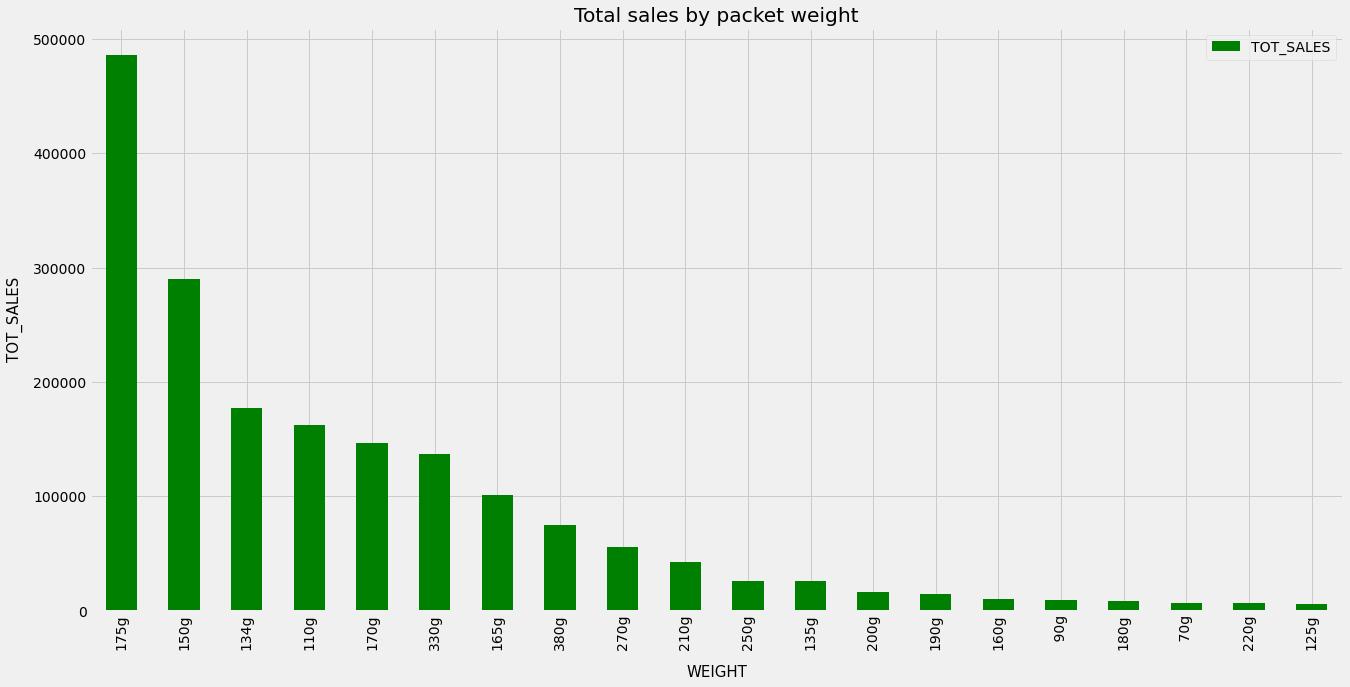

In [177]:
#relationship between purchases and weight
df_weightsales.plot.bar(x ="WEIGHT",y= "TOT_SALES", color = 'Green',figsize=(20,10))
plt.title("Total sales by packet weight")
plt.xlabel("WEIGHT",fontsize=15,labelpad = 15)
plt.ylabel("TOT_SALES", fontsize =15,labelpad=10)
plt.show()


In [178]:
#expenditure by lifestage
totalsales_cust= df_custrans.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['TOT_SALES']].sum().reset_index()
totalsales_cust = totalsales_cust.sort_values('TOT_SALES', ascending=False)

In [179]:
totalsales_cust

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


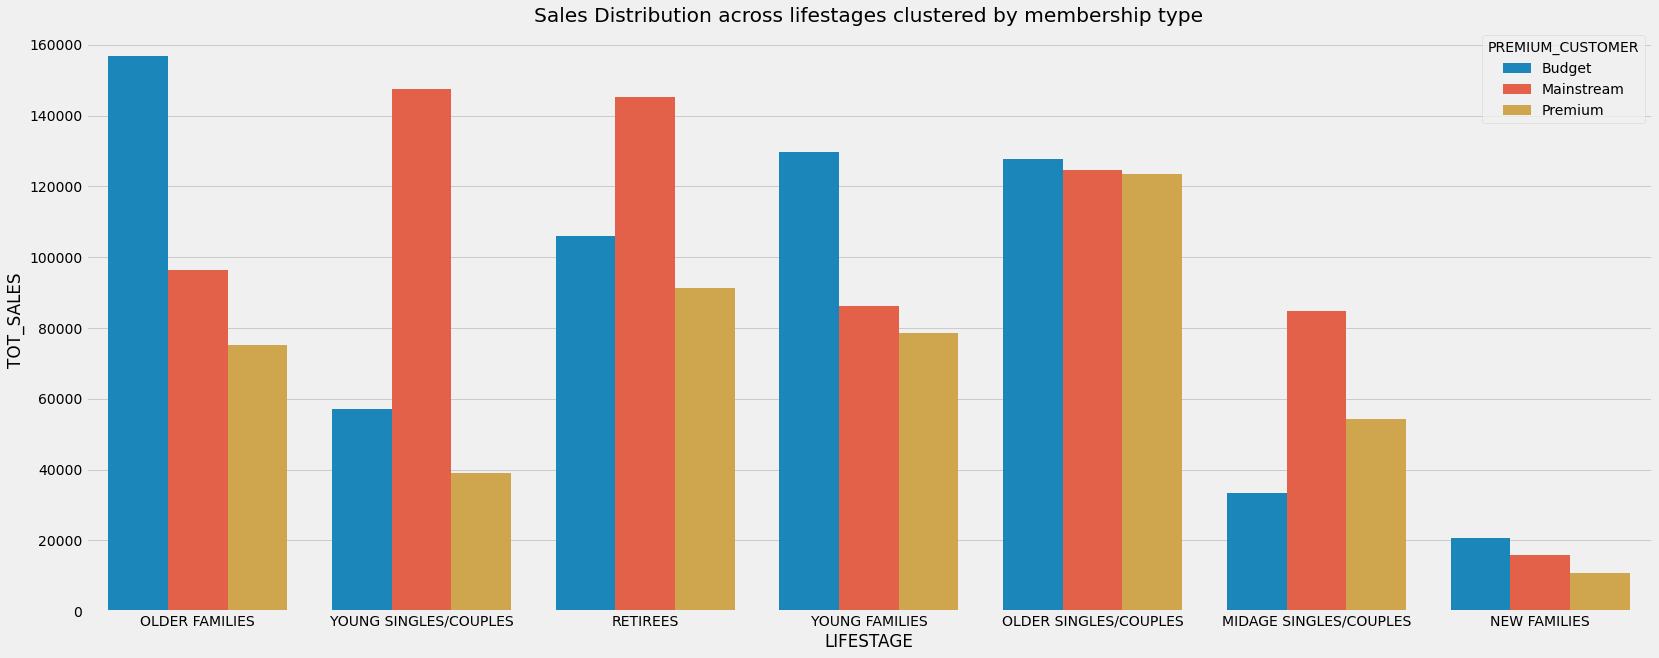

In [180]:
plt.figure(figsize=(25,10))
sns.barplot(x='LIFESTAGE',y='TOT_SALES',hue='PREMIUM_CUSTOMER',data = totalsales_cust)
plt.title("Sales Distribution across lifestages clustered by membership type")
plt.show()

In [181]:
#expenditure by lifestage
total_cust= df_custrans.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['PROD_QTY']].sum().reset_index()
total_cust = total_cust.sort_values('PROD_QTY', ascending=False)

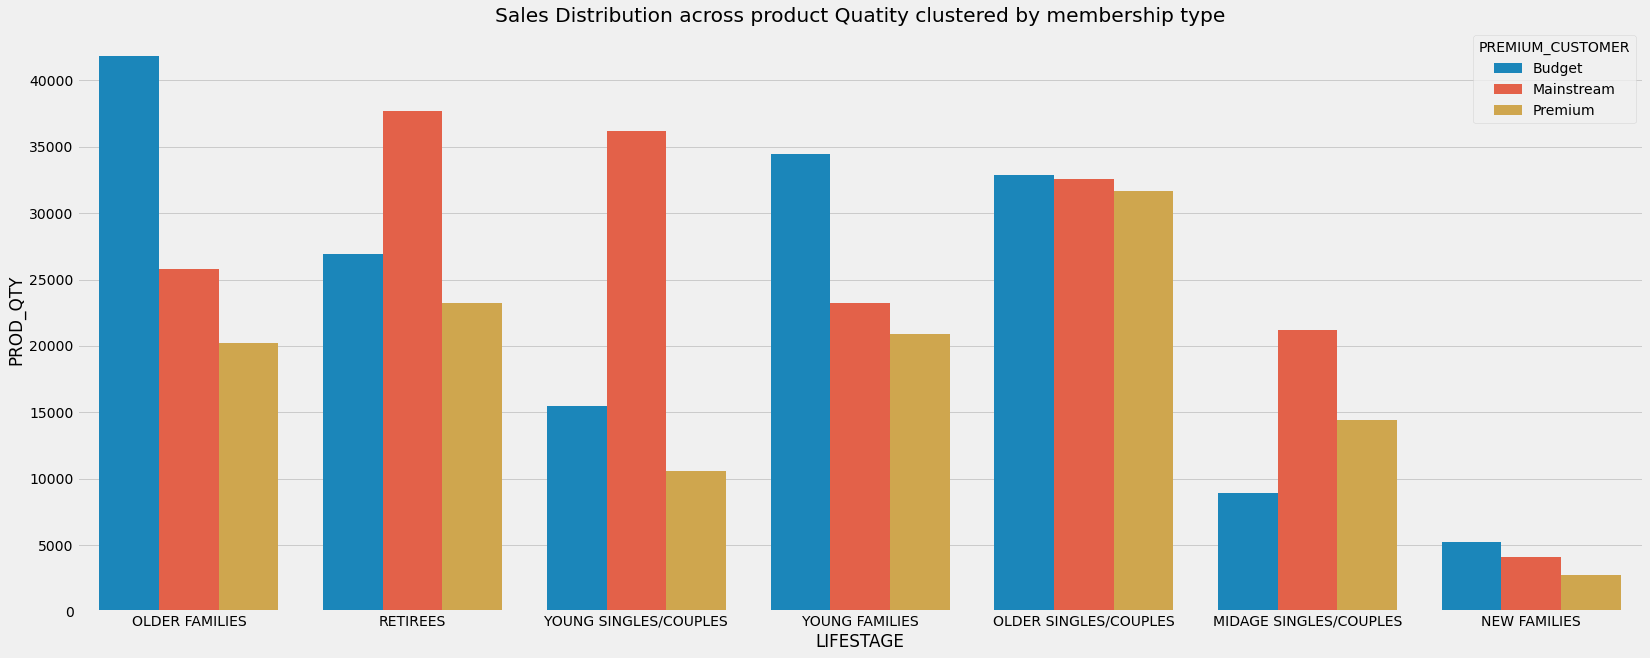

In [193]:
plt.figure(figsize=(25,10))
sns.barplot(x='LIFESTAGE',y='PROD_QTY',hue='PREMIUM_CUSTOMER',data = total_cust)
plt.title("Sales Distribution across product Quatity clustered by membership type")
plt.show()

In [183]:
#Buying patterns of different customers
df_custype = df_custrans.groupby(by =['PREMIUM_CUSTOMER'], as_index=False)['TOT_SALES'].sum().sort_values(by ='TOT_SALES',ascending = False)

In [184]:
#df_custype.set_index('PREMIUM_CUSTOMER', inplace=True)
df_custype

,PREMIUM_CUSTOMER,TOT_SALES
1,Mainstream,700865.40
0,Budget,631406.85
2,Premium,472905.45


Text(0, 0.5, '')

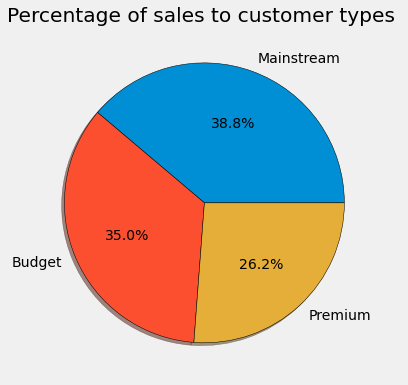

In [185]:
plt.style.use("fivethirtyeight")
plt.title("Percentage of sales to customer types ")
df_custype.set_index("PREMIUM_CUSTOMER")["TOT_SALES"].plot.pie(autopct='%1.1f%%',wedgeprops ={'edgecolor':'black'},shadow =True)
plt.ylabel(None)

In [186]:
df_custpurchases= df_custrans.groupby(by =['LYLTY_CARD_NBR'], as_index=False)['PROD_QTY'].sum().sort_values(by ='PROD_QTY',ascending = False)

In [187]:
df_custrans["LYLTY_CARD_NBR"].count()

248090

In [188]:
df_custrans['PROD_QTY'].sum()

470399.0

In [189]:
#comparing chip purchases and customers
df_custrans["LYLTY_CARD_NBR"].count() > df_custrans['PROD_QTY'].sum()

False

<AxesSubplot:xlabel='Number of Transactions per brand', ylabel='Brands'>

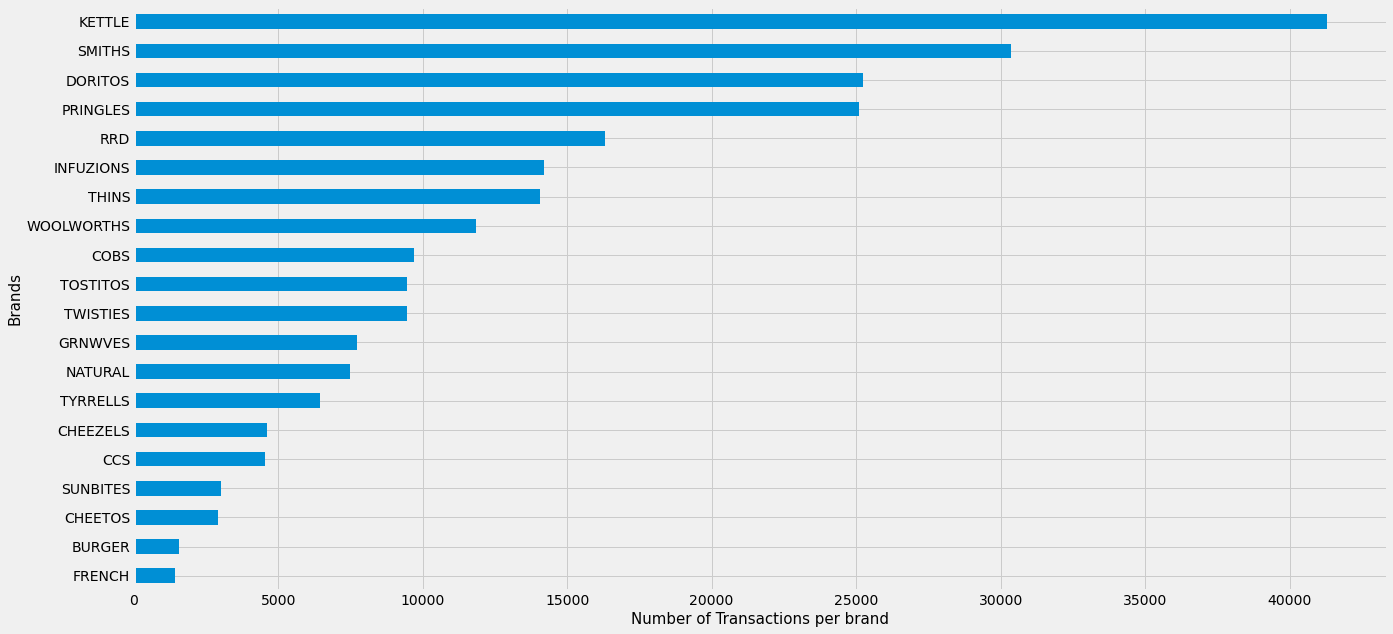

In [190]:
plt.xlabel('Number of Transactions per brand',{'fontsize':15})
plt.ylabel('Brands',{'fontsize':15})
df_custrans.BRAND.value_counts().sort_values().plot(kind='barh',figsize=(20,10))

In [191]:
#Sales by brand and customer type
totalsales_brands= df_custrans.groupby(['BRAND','PREMIUM_CUSTOMER'])[['TOT_SALES']].sum().reset_index()
totalsales_brands = totalsales_brands.sort_values('TOT_SALES', ascending=False)

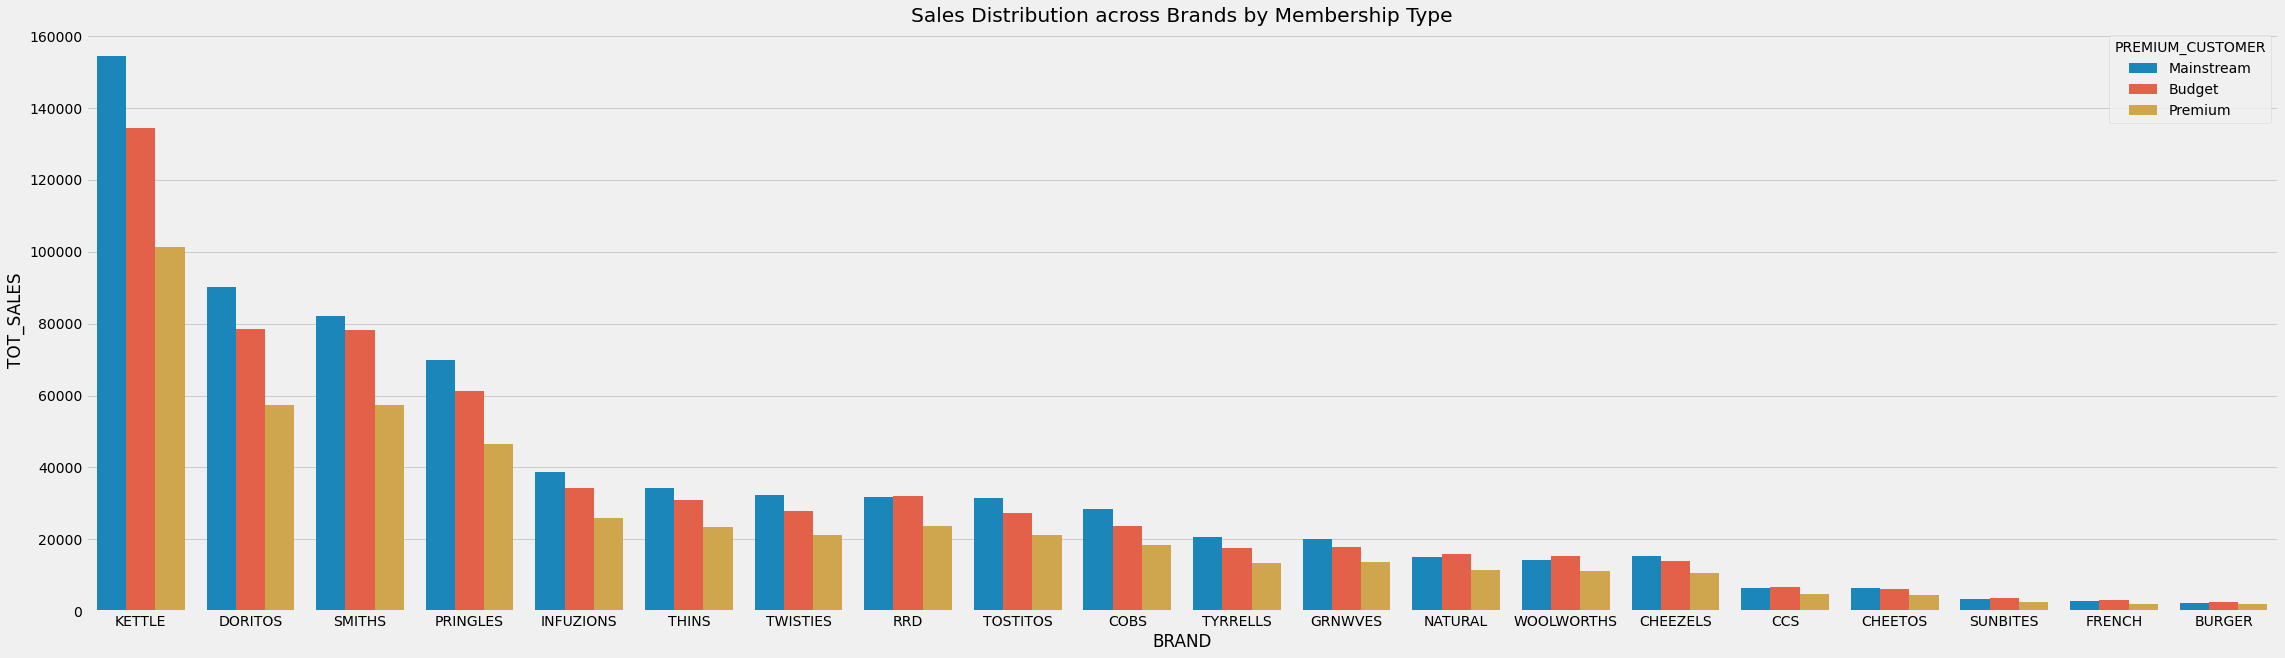

In [192]:
plt.figure(figsize=(35,10))
sns.barplot(x='BRAND',y='TOT_SALES',hue='PREMIUM_CUSTOMER',data = totalsales_brands)
plt.title("Sales Distribution across Brands by Membership Type")
plt.show()